In [84]:
import numpy as np
import pandas as pd
import wrangle
import itertools
from scipy import stats

#from pandas_profiling import ProfileReport


import matplotlib.pyplot as plt
import seaborn as sns

# pd.options.display.max_columns = 186
# pd.set_option("display.max_rows", 101)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 200)

In [6]:
df = pd.read_csv('training_v2.csv')

In [14]:
df = wrangle.get_training_data()

---Acquiring the Data---
rows: 91713, columns: 186


---Handling Missing Values---
Filling nulls with mode for the following features:
	 * age
	 * bmi
	 * ethnicity
Handling nulls within rows
	 * Dropping patients with no recorded gender
		 - Number of patients dropped: 25
Filling nulls with 0 (aka False) for the following columns
	 * arf_apache
	 * intubated_apache
	 * cirrhosis
	 * aids
	 * diabetes_mellitus
	 * hepatic_failure
	 * immunosuppression
	 * leukemia
	 * lymphoma
	 * solid_tumor_with_metastasis
	 * hospital_death
	 * ethnicity
	 * gender
	 * age
	 * bmi


In [15]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [16]:
df.shape

(91688, 186)

In [70]:
working_df = df[['hospital_id', 'hospital_death', 'bmi', 'age', 'gender', 'ethnicity', 'solid_tumor_with_metastasis', 'lymphoma', 'leukemia', 'immunosuppression', 'hepatic_failure', 'diabetes_mellitus', 'aids', 'cirrhosis', 'intubated_apache', 'arf_apache']].copy()

In [71]:
working_df.head()

,hospital_id,hospital_death,bmi,age,gender,ethnicity,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,aids,cirrhosis,intubated_apache,arf_apache
0,118,0,22.73,68.0,M,Caucasian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,81,0,27.42,77.0,F,Caucasian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,118,0,31.95,25.0,F,Caucasian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,118,0,22.64,81.0,F,Caucasian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,0,14.00,19.0,M,Caucasian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91688 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  91688 non-null  int64  
 1   hospital_death               91688 non-null  int64  
 2   bmi                          91688 non-null  float64
 3   age                          91688 non-null  float64
 4   gender                       91688 non-null  object 
 5   ethnicity                    91688 non-null  object 
 6   solid_tumor_with_metastasis  91688 non-null  float64
 7   lymphoma                     91688 non-null  float64
 8   leukemia                     91688 non-null  float64
 9   immunosuppression            91688 non-null  float64
 10  hepatic_failure              91688 non-null  float64
 11  diabetes_mellitus            91688 non-null  float64
 12  aids                         91688 non-null  float64
 13  cirrhosis       

In [73]:
working_df.isna().sum()

hospital_id                    0
hospital_death                 0
bmi                            0
age                            0
gender                         0
ethnicity                      0
solid_tumor_with_metastasis    0
lymphoma                       0
leukemia                       0
immunosuppression              0
hepatic_failure                0
diabetes_mellitus              0
aids                           0
cirrhosis                      0
intubated_apache               0
arf_apache                     0
dtype: int64

In [91]:
sns.heatmap(working_df.drop(['hospital_id'],axis=1), annot=True, annot_kws={"size": 7})
# sns.heatmap(working_df,  nominal_columns=['hospital_id', 'gender', 'ethnicity'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [75]:
working_df = working_df.astype({'patient_id': 'object'})

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [76]:
working_df = working_df.astype({'hospital_id': 'object'})

In [77]:
working_df = working_df.astype({'gender': 'object'})

In [78]:
working_df = working_df.astype({'ethnicity': 'object'})

In [79]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91688 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  91688 non-null  object 
 1   hospital_death               91688 non-null  int64  
 2   bmi                          91688 non-null  float64
 3   age                          91688 non-null  float64
 4   gender                       91688 non-null  object 
 5   ethnicity                    91688 non-null  object 
 6   solid_tumor_with_metastasis  91688 non-null  float64
 7   lymphoma                     91688 non-null  float64
 8   leukemia                     91688 non-null  float64
 9   immunosuppression            91688 non-null  float64
 10  hepatic_failure              91688 non-null  float64
 11  diabetes_mellitus            91688 non-null  float64
 12  aids                         91688 non-null  float64
 13  cirrhosis       

In [87]:
working_df.shape

(91688, 16)

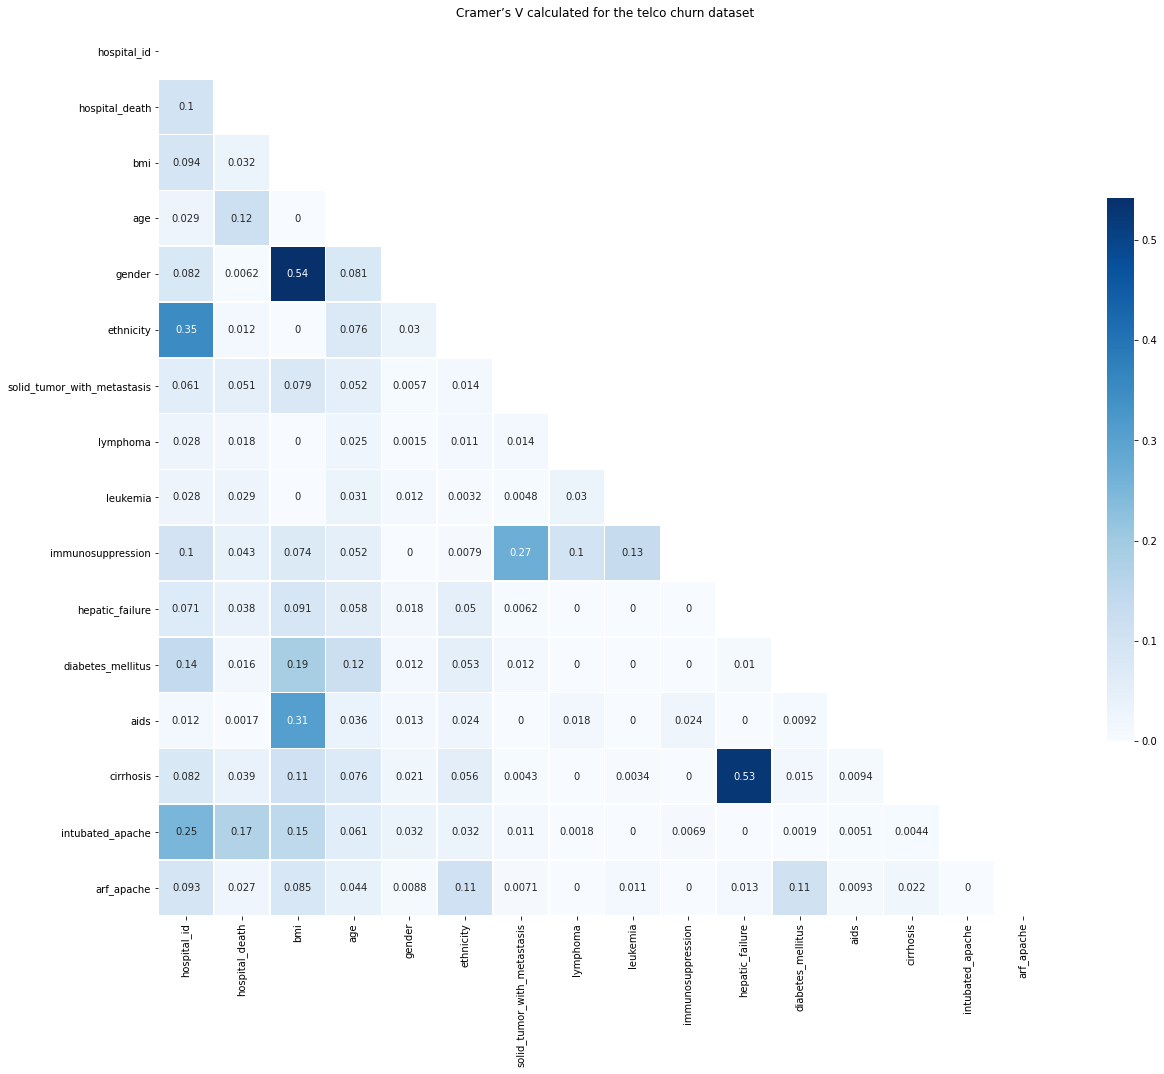

In [85]:
def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer'v V statistic
    """
    
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(working_df.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calculate s of every combination of variables
for col1, col2 in itertools.combinations(cols, 2):

    a, b = working_df[col1], working_df[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(a,b) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap='Blues', square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Cramer’s V calculated for the telco churn dataset')
plt.show()